Questions:

Q-1: What is the age distribution of survivors vs. non-survivors?

Q-2: Are there survival differences across age groups (e.g., children, adults, seniors)?

Q-3: Can we bin age into categories and compare survival?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic= sns.load_dataset("titanic")

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


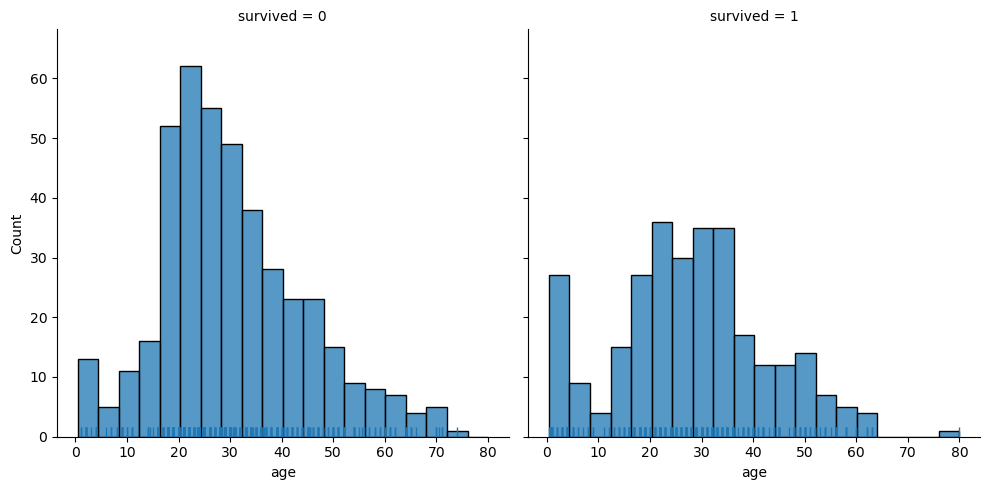

<Figure size 2000x1500 with 0 Axes>

In [12]:
sns.displot(data= titanic,x="age",col="survived",rug=True)
plt.figure(figsize=(20,15))
plt.show()

In [24]:
titanic["age_group"]= titanic["age"].apply(lambda x:"adult" if 18<=x<60 else ("senior" if x>60 else "children"))

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [52]:
titanic_survived= titanic.groupby(by=["age_group","survived","sex","class"],observed=True).agg(count=("sex","count"))

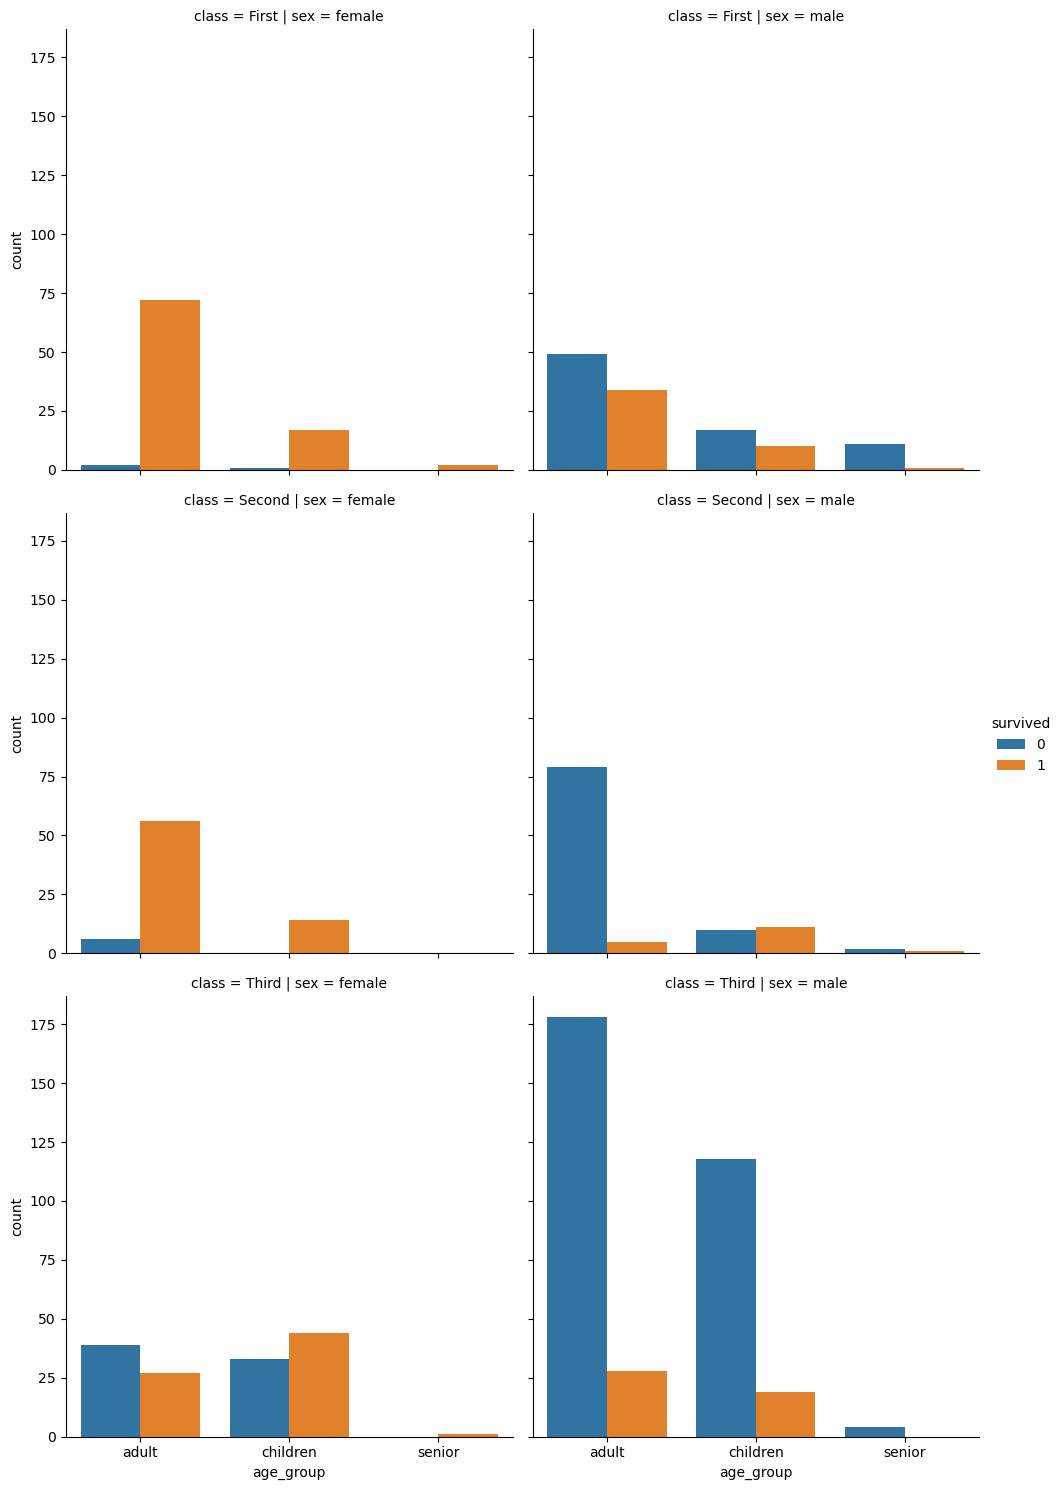

In [61]:
sns.catplot(data=titanic_survived,x="age_group",y="count", kind="bar", hue="survived",col="sex",row="class")
plt.ylabel("Number of Passengers")
plt.show()